<a href="https://colab.research.google.com/github/selsaady1/MAT-421-Elsaady/blob/main/Module_H_PART2(Elsaady).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Module H PART 2, Chapter 22 Ordinary Differential Equation - Initial Value Problems
## Saif Elsaady
## MAT 421, April 9 2023

In [ ]:
## 22.4 Numerical Error and Instability

With relation to integration strategies for ODEs, accuracy & stability are the two important factors to think about. The capacity of a scheme to approach the exact solution, which is generally unknown, as a function of a h is referred to as accuracy. The capacity of a strategy to prevent an error from increasing as it integrates forward in time is known as stability. The scheme is stable if the fault doesn't increase; otherwise, it is unstable.

In [ ]:
#In the following example below we use the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve the pendulum equation 
# This is done over a given intercal, h, and exact solution parameters


#Importing the appropriate libraries
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
%matplotlib inline 

#defining the parameters to be worked on, frequency, and numerical grid
h = 0.1
t = np.arange(0, 5.1, h)
w = 4
s0 = np.array([[1], [0]])


#Defining the steps size approximation modifications in this instance
m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

#We now integrate and construct a for loop for appropriate measures
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

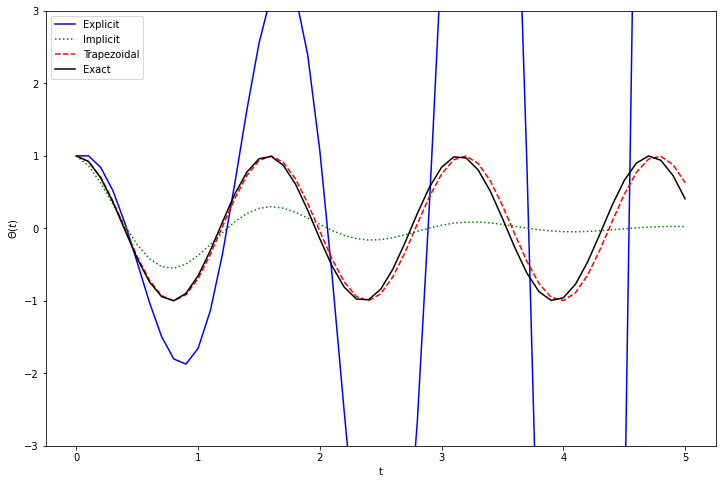

In [ ]:
#Now we plot the figure using created data.
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

In [ ]:
## 22.5 Predictor-Corrector Methods

The function, F(t,S(t)), returns the change of state dS(t)dt for any time and state value. By repeatedly requesting the F function at various points (predictions) and utilizing a weighted average of the responses (corrections), predictor-corrector methods of addressing initial value issues increase the approximation accuracy of non-predictor-corrector approaches. It primarily use the predictor and corrector formulae. The answer is first predicted to be at tj+1 by the predictor, which is an explicit formula.

In [ ]:
#Now we observe the following below: 

THe predictor step of the midpoint method is :

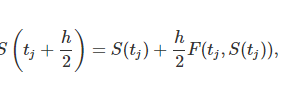

The Fourth Order Runge Kutta (RK4) method is a well-known technique for accurately integrating ODEs. It is generated from the Taylor series using a process similar to the second-order method that we just reviewed. The four points used in this strategy are k1, k2, k3, and k4. The approximate answer is created using an average value of these. Below is the formula.

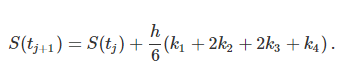

In [ ]:
## 22.6 Python ODE Solvers

There are several built-in methods in Scipy for resolving initial value issues. The scipy.integrate.solve ivp function is the one that is used the most frequently. 

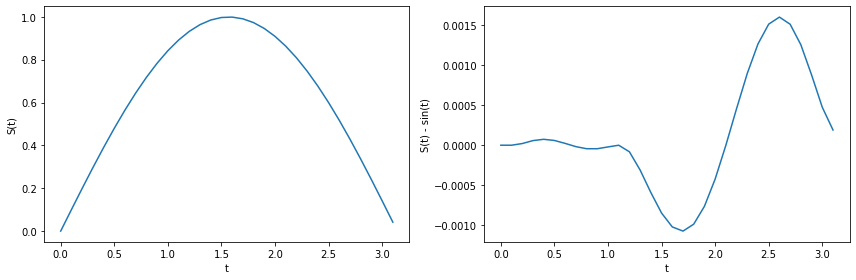

In [ ]:
#importing the appropriate libraries and components
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib inline


#Computation
F = lambda t, s: np.cos(t)
t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)


#plotting the data
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

The difference between the estimated and precise answer, which is smaller than 1e-7, is highlighted by the example employing the rtol and atol.

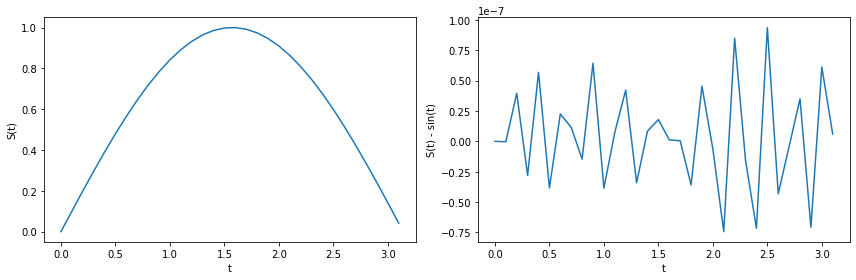

In [ ]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

Python ODE solvers are particulary important because they make several processes easier.